# K-Means Clustering
**Student Name:** Ashraful Islam Tanzil  
**ID:** 0112230028

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 5)

In [ ]:
#df = pd.read_csv('../../dataset/student_lifestyle_100k.csv')
df = pd.read_csv('../../dataset/tanzil.csv')
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
X = df[numeric_cols].fillna(df[numeric_cols].mean()).values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

print(f'Data shape: {X_scaled.shape}')

Data shape: (1017, 8)


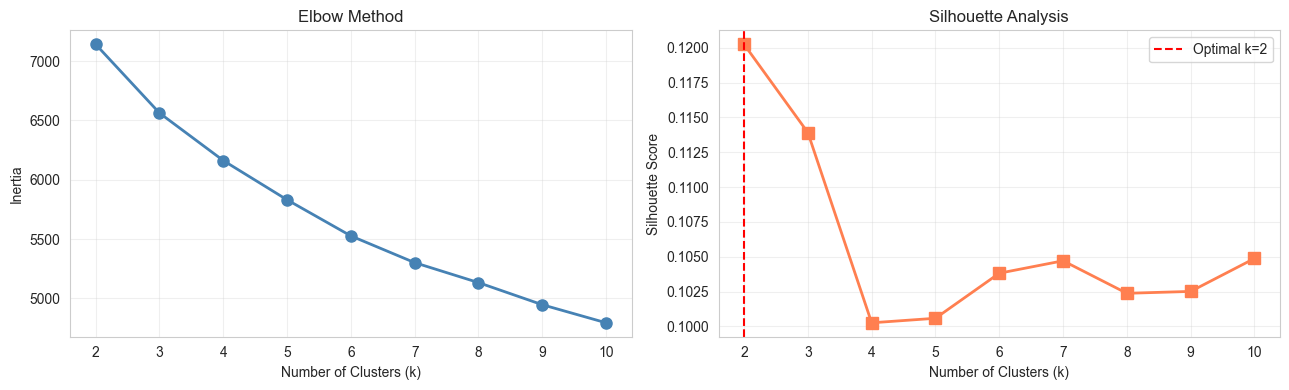

In [13]:
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, km.labels_))

optimal_k = K_range[np.argmax(silhouette_scores)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
ax1.plot(K_range, inertias, 'o-', linewidth=2, markersize=8, color='steelblue')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method')
ax1.grid(alpha=0.3)

ax2.plot(K_range, silhouette_scores, 's-', linewidth=2, markersize=8, color='coral')
ax2.axvline(optimal_k, color='red', linestyle='--', label=f'Optimal k={optimal_k}')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Analysis')
ax2.legend()
ax2.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [14]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

print(f'Silhouette Score: {silhouette_score(X_scaled, labels):.4f}')
print(f'Davies-Bouldin Index: {davies_bouldin_score(X_scaled, labels):.4f}')

Silhouette Score: 0.1202
Davies-Bouldin Index: 2.6142


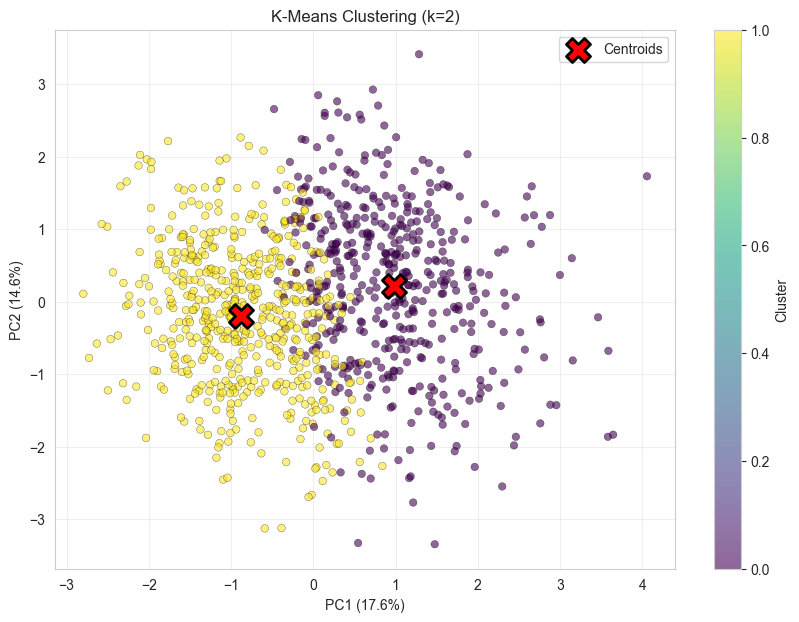

In [15]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis', 
                       s=30, alpha=0.6, edgecolors='black', linewidth=0.3)
centers_2d = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], c='red', marker='X', s=300, 
            edgecolors='black', linewidth=2, label='Centroids')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(alpha=0.3)
plt.show()